# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&q="
api_extension = f"&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(url + city + api_extension).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url['coord']['lat']
        city_lng = city_url['coord']['lon']
        city_max_temp = city_url['main']['temp_max']
        city_humidity = city_url['main']['humidity']
        city_clouds = city_url['clouds']['all']
        city_wind = city_url['wind']['speed']
        city_country = city_url['sys']['country']
        city_date = city_url['dt']

        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     #If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
           
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | haiku-pauwela
Processing Record 3 of Set 1 | lazaro cardenas
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | pudozh
Processing Record 6 of Set 1 | charters towers
Processing Record 7 of Set 1 | sao vicente
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | kingston
Processing Record 12 of Set 1 | cabaritan east
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | zaozersk
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | manzhouli
Processing Record 17 of Set 1 | alofi
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | san-pedro
Processing Record 22 of Set 1 | cha

In [6]:
print(city_url)

{'coord': {'lon': 118.5667, 'lat': -20.3167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 33.03, 'feels_like': 32.84, 'temp_min': 33.03, 'temp_max': 33.03, 'pressure': 1011, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 360}, 'clouds': {'all': 50}, 'dt': 1712225376, 'sys': {'type': 1, 'id': 9585, 'country': 'AU', 'sunrise': 1712182409, 'sunset': 1712225014}, 'timezone': 28800, 'id': 2063042, 'name': 'Port Hedland', 'cod': 200}


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-12.15,85,20,9.26,CA,1712225329
1,haiku-pauwela,20.9219,-156.3051,22.25,84,40,8.23,US,1712225329
2,lazaro cardenas,17.9583,-102.2000,20.29,86,7,1.72,MX,1712225197
3,port mathurin,-19.6833,63.4167,27.09,80,96,8.64,MU,1712225329
4,pudozh,61.8099,36.5345,-6.70,89,100,5.81,RU,1712225329


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-12.15,85,20,9.26,CA,1712225329
1,haiku-pauwela,20.9219,-156.3051,22.25,84,40,8.23,US,1712225329
2,lazaro cardenas,17.9583,-102.2000,20.29,86,7,1.72,MX,1712225197
3,port mathurin,-19.6833,63.4167,27.09,80,96,8.64,MU,1712225329
4,pudozh,61.8099,36.5345,-6.70,89,100,5.81,RU,1712225329


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

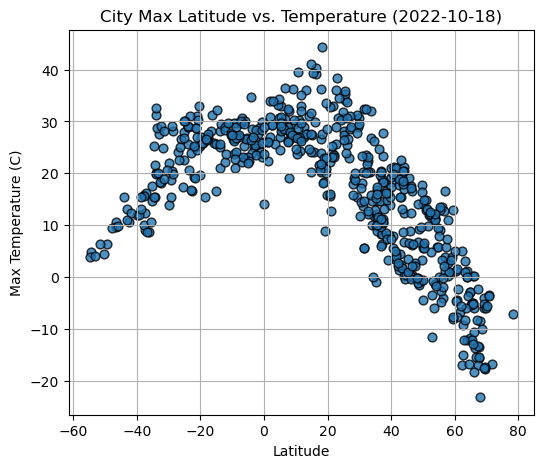

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,5),edgecolors="black",s = 40,alpha = 0.80,xlabel = "Latitude", 
                  ylabel = "Max Temperature (C)", title="City Max Latitude vs. Temperature (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

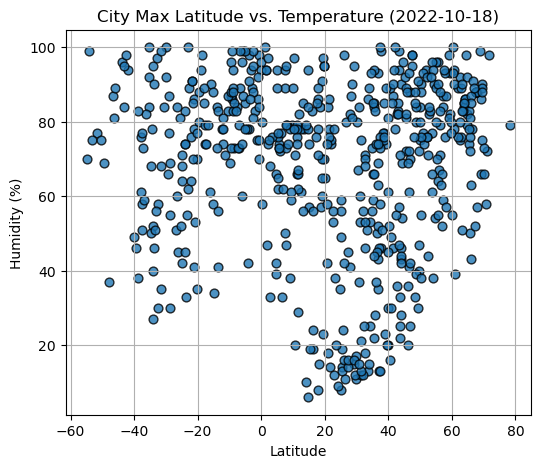

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,5),edgecolors="black",s = 40,alpha = 0.80,xlabel = "Latitude", 
                  ylabel = "Humidity (%)", title="City Max Latitude vs. Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

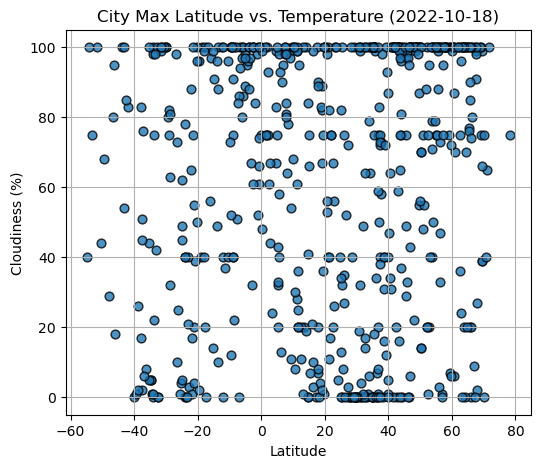

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,5),edgecolors="black",s = 40,alpha = 0.80,xlabel = "Latitude", 
                  ylabel = "Cloudiness (%)", title="City Max Latitude vs. Temperature (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

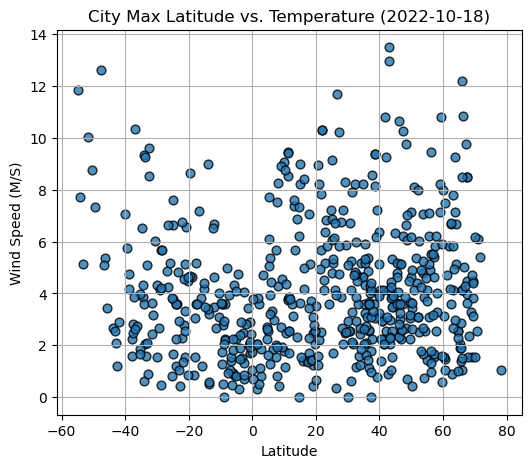

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,5),edgecolors="black",s = 40,alpha = 0.80,xlabel = "Latitude", 
                  ylabel = "Wind Speed (M/S)", title="City Max Latitude vs. Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-12.15,85,20,9.26,CA,1712225329
1,haiku-pauwela,20.9219,-156.3051,22.25,84,40,8.23,US,1712225329
2,lazaro cardenas,17.9583,-102.2000,20.29,86,7,1.72,MX,1712225197
4,pudozh,61.8099,36.5345,-6.70,89,100,5.81,RU,1712225329
8,vorgashor,67.5833,63.9500,-13.44,88,99,3.98,RU,1712225330


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port mathurin,-19.6833,63.4167,27.09,80,96,8.64,MU,1712225329
5,charters towers,-20.1000,146.2667,25.33,70,96,4.48,AU,1712225329
6,sao vicente,-23.9631,-46.3919,25.71,83,0,1.19,BR,1712225211
7,margaret river,-33.9500,115.0667,20.12,52,100,0.64,AU,1712225329
9,port-aux-francais,-49.3500,70.2167,6.33,69,68,7.35,TF,1712225330


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8582461815335105


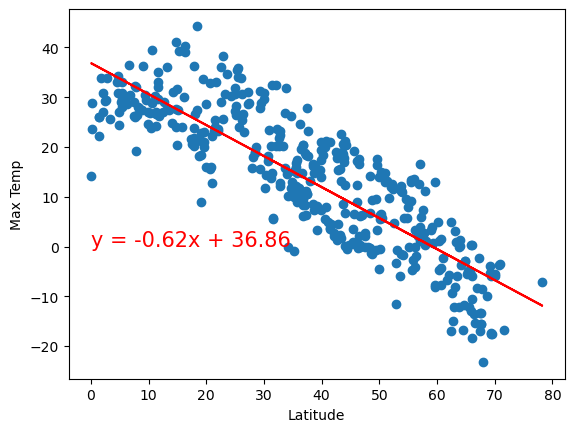

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
def plots(x_values, y_values, coords):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_value = x_values.corr(y_values)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    print(f'The r-value is: {r_value}')
    plt.show()

plots(x_values, y_values, (0,0))

The r-value is: 0.7159338181668404


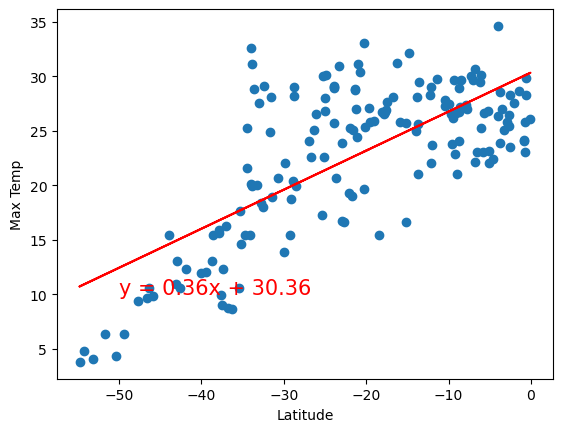

In [38]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# r_value = x_values.corr(y_values)
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(35.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# print(f'The r-value is: {r_value}')
# #plt.show()
plots(x_values, y_values,(-50,10))

**Discussion about the linear relationship:** 
This data shows extremely clear results. We can see this from looking at the graph, and calculating the correlation. it is very clear that the closer you get to the equator, the higher the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21287147660898798


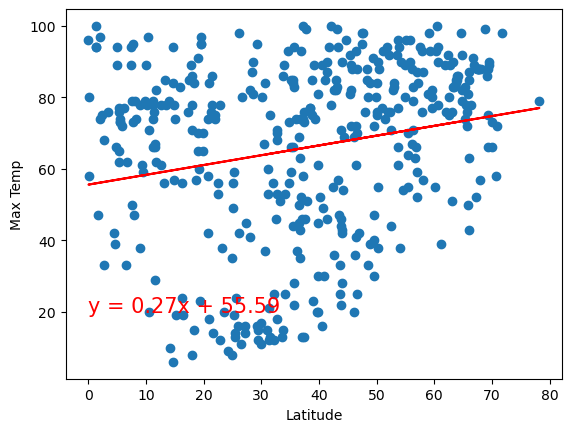

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# r_value = x_values.corr(y_values)
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(35.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# print(f'The r-value is: {r_value}')
# plt.show()
plots(x_values, y_values,(0,20))

The r-value is: 0.2542326677547117


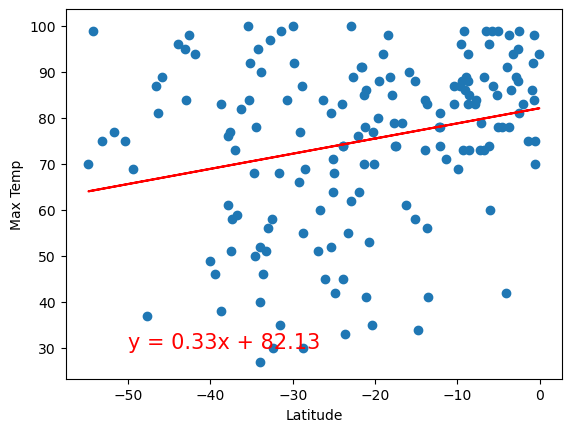

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# r_value = x_values.corr(y_values)
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# print(f'The r-value is: {r_value}')
# plt.show()
plots(x_values, y_values,(-50,30))

**Discussion about the linear relationship:**  Looking at his set of data, it does not seem so convincing to say the least. There is not much correlation between the equator and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1346412116861617


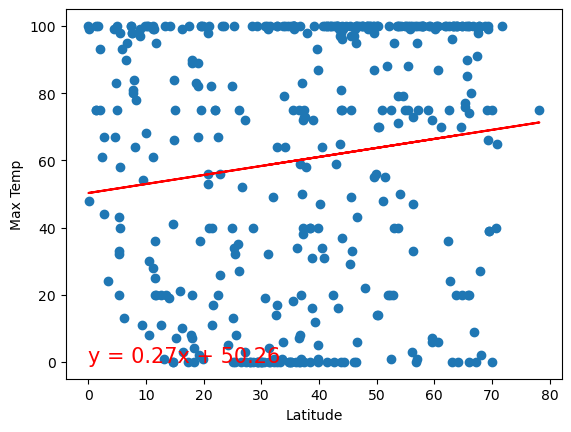

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# r_value = x_values.corr(y_values)
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# print(f'The r-value is: {r_value}')
# plt.show()
plots(x_values, y_values,(0,0))

The r-value is: 0.26324814029537186


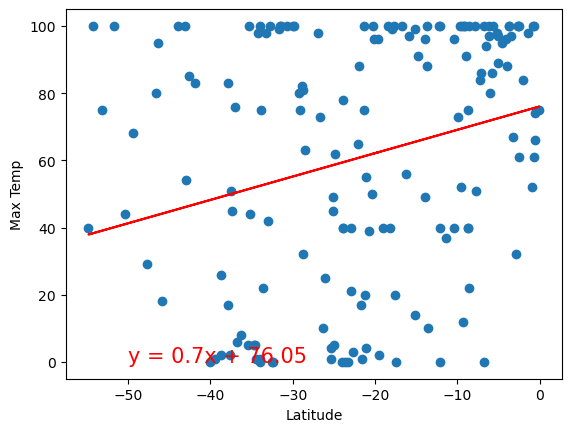

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# r_value = x_values.corr(y_values)
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# print(f'The r-value is: {r_value}')
# plt.show()
plots(x_values, y_values,(-50,0))

**Discussion about the linear relationship:** Here too, we can see that cloudiness has nothing to do with your distance to the equator. The correlation line is telling us that there is not much to it.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06636074830418826


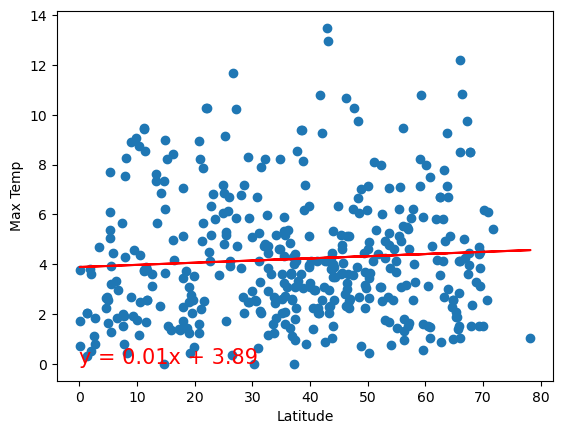

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# r_value = x_values.corr(y_values)
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed')
# print(f'The r-value is: {r_value}')
# plt.show()
plots(x_values, y_values,(0,0))

The r-value is: -0.44463728142028536


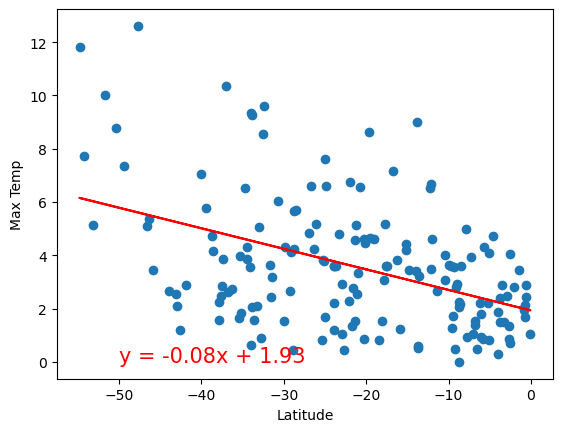

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# r_value = x_values.corr(y_values)
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed')
# print(f'The r-value is: {r_value}')
# plt.show()
plots(x_values, y_values,(-50,0))

**Discussion about the linear relationship: This is on is very apparent, there is no need for any correlation equation. There is no pattern showing anything the wind looks pretty even across the whole world.